# Exploratory Data Analysis and Modeling
This notebook contains the EDA, preprocessing, and model training steps for the used car price predictor.

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv('../data/car_data.csv')  # adjust path as needed
df.head()

# 3. Feature Engineering
df['brand'] = df['name'].apply(lambda x: x.split()[0])
df['model'] = df['name'].apply(lambda x: ' '.join(x.split()[1:2]))  # short model name
df['car_age'] = 2025 - df['year']

def extract_number(x):
    try:
        return float(str(x).split()[0])
    except:
        return np.nan

def clean_torque(x):
    try:
        return float(str(x).split('Nm')[0].strip().split()[0])
    except:
        return np.nan

df['mileage'] = df['mileage'].apply(extract_number)
df['engine'] = df['engine'].apply(extract_number)
df['max_power'] = df['max_power'].apply(extract_number)
df['torque'] = df['torque'].apply(clean_torque)

# Drop rows with missing values
df.dropna(inplace=True)

# 4. Encoding
fuel_enc = {'Petrol': 2, 'Diesel': 1, 'CNG': 0, 'LPG': 3, 'Electric': 4}
seller_enc = {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}
trans_enc = {'Manual': 1, 'Automatic': 0}
owner_enc = {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 
             'Fourth & Above Owner': 3, 'Test Drive Car': 4}

df['fuel'] = df['fuel'].map(fuel_enc)
df['seller_type'] = df['seller_type'].map(seller_enc)
df['transmission'] = df['transmission'].map(trans_enc)
df['owner'] = df['owner'].map(owner_enc)

# 5. Final Features
features = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
            'mileage', 'engine', 'max_power', 'torque', 'seats', 'car_age']
target = 'selling_price'

X = df[features]
y = df[target]

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 8. Evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 9. Save Model
pickle.dump(model, open('../models/best_model.pkl', 'wb'))
print("Model saved successfully.")


R2 Score: 0.9750609589038899
RMSE: 128647.00722986943
Model saved successfully.


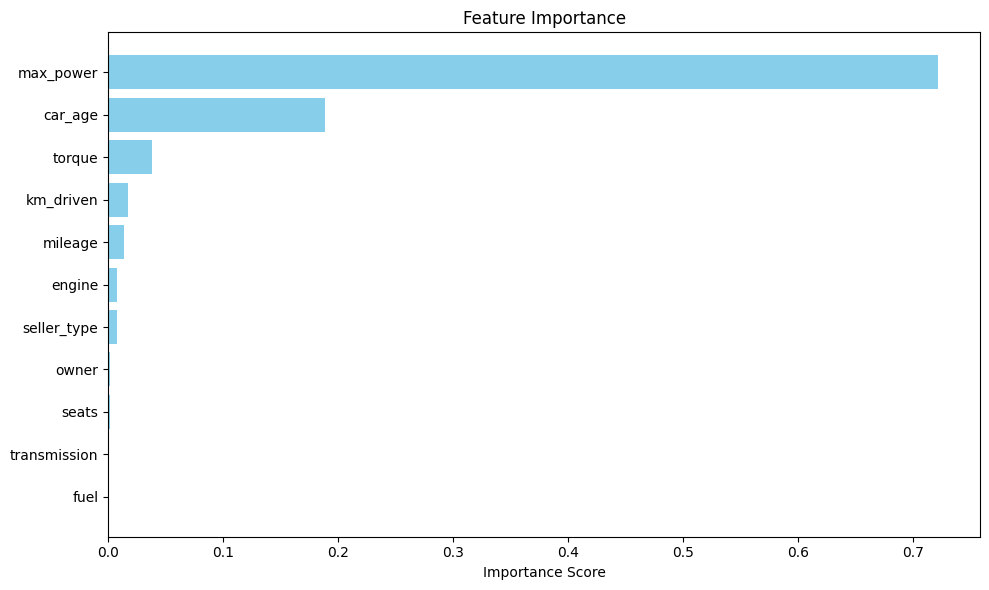

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Load the trained model
model_path = '../models/best_model.pkl'  # Update path if needed
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Get feature importances from model
feature_names = model.feature_names_in_  # works with sklearn 1.0+
importances = model.feature_importances_

# Create DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
